# Sentiment Analysis
    - Use hotstar data, predict sentiment score for the Reviews column using vader package
    - Convert score to labels
            – Positive (score > 0.05)
            – Negative (score < .0.05)
            – Neutral (-0.05 <= score <= 0.05)
- Calculate the accuracy score
- Compare the accuracy with supervised models, and comment whether supervised or unsupervised gives best accuracy
- Create a multi-line chart for comparing no. of positive, negative and neutral reviews for each day (we have one week data)

In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
hotstar = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/hotstar.allreviews_Sentiments.csv')

In [16]:
hotstar

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral
5,6,BeingUsual,8/7/2017,@hotstartweets Not able 2 watch the latest epi...,@hotstartweets not able 2 watch the latest epi...,Help,Negative,139,Twitter,2017,8,7,Neutral
6,7,yashvi_singh,8/5/2017,Please allow RuPay or Maestro payment gateways...,please allow rupay or maestro payment gateways...,Help,Negative,139,Twitter,2017,8,5,Positive
7,8,bushrareal202,8/7/2017,@hotstar_helps why today s epi of #LoveKaHaiIn...,@hotstar_helps why today s epi of #lovekahaiin...,Help,Negative,138,Twitter,2017,8,7,Positive
8,9,sachinmittal331,8/8/2017,@hotstartweets #HotStarFraud I paid for the su...,@hotstartweets #hotstarfraud i paid for the su...,Help,Negative,138,Twitter,2017,8,8,Positive
9,10,ankush2887,8/5/2017,@hotstartweets i have a premium accnt at hotst...,@hotstartweets i have a premium accnt at hotst...,Help,Negative,138,Twitter,2017,8,5,Neutral


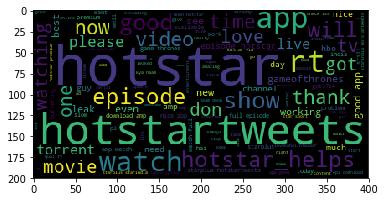

In [17]:
input_string2 = ' '.join(hotstar['Lower_Case_Reviews'])
wc = WordCloud(background_color = "Black").generate(input_string2)
plt.imshow(wc)

In [18]:
docs = hotstar['Lower_Case_Reviews'].str.lower().str.replace('[^a-z ]', '')
docs.head()

0                                                   hh
1                                                   no
2    hotstarhelps during paymnt for premium subscri...
3    hotstartweets i am currently on jio network an...
4    hotstartweets the episodes of sarabhai vs sara...
Name: Lower_Case_Reviews, dtype: object

In [19]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [20]:
stemmer = nltk.stem.PorterStemmer()

In [21]:
docs_clean2 = []
for doc in docs.head(10):
    words = doc.split(' ')
    #print(doc)
    #print(words)
    words_clean2 =[]
    for word in words:
        if word not in stopwords:
            words_clean2.append(stemmer.stem(word))
    
    doc_clean2 = ' '.join(words_clean2)
    docs_clean2.append(doc_clean2)
    print(docs_clean2)
    #print(words_clean)
    print('-------------------------')

['hh']
-------------------------
['hh', '']
-------------------------
['hh', '', 'hotstarhelp paymnt premium subscript transact fail twice receiv refund one transact']
-------------------------
['hh', '', 'hotstarhelp paymnt premium subscript transact fail twice receiv refund one transact', 'hotstartweet current jio network would like know whether abl watch epl telecast star sport select hd']
-------------------------
['hh', '', 'hotstarhelp paymnt premium subscript transact fail twice receiv refund one transact', 'hotstartweet current jio network would like know whether abl watch epl telecast star sport select hd', 'hotstartweet episod sarabhai vs sarabhai season  download abl watch offlin pleas smthng']
-------------------------
['hh', '', 'hotstarhelp paymnt premium subscript transact fail twice receiv refund one transact', 'hotstartweet current jio network would like know whether abl watch epl telecast star sport select hd', 'hotstartweet episod sarabhai vs sarabhai season  downloa

In [22]:
docs=hotstar['Lower_Case_Reviews'].str.lower().str.replace('[^a-z ]','')

def clean_sentence(text):
    words=text.split(' ')
    words_clean2 = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean2)
docs_clean2 = docs.apply(clean_sentence)
docs_clean2.head()

0                                                   hh
1                                                     
2    hotstarhelp paymnt premium subscript transact ...
3    hotstartweet current jio network would like kn...
4    hotstartweet episod sarabhai vs sarabhai seaso...
Name: Lower_Case_Reviews, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(10)
vectorizer.fit(docs_clean2)
dtm = vectorizer.transform(docs_clean2)
dtm

<5053x6145 sparse matrix of type '<class 'numpy.int64'>'
	with 37273 stored elements in Compressed Sparse Row format>

In [24]:
no_of_zeros = (5053 * 6145) - 37273
sparsity = (no_of_zeros) / (5053 * 6145) * 100
sparsity

99.87996078025331

In [25]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns = vectorizer.get_feature_names())
(df_dtm == 0).sum().sum()

31013412

In [26]:
(5053 * 6145) - 31013412

37273

In [28]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_dtm, 
                               test_size = 0.2,
                              random_state = 100)

In [29]:
train_y = hotstar.iloc[train_x.index]['Sentiment_Polarity']
test_y = hotstar.iloc[test_x.index]['Sentiment_Polarity']

In [30]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

df_pred = pd.DataFrame({'actual' : test_y,
                       'predicted' : test_pred})


df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']


df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100

66.36993076162216

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x,train_y)

test_pred = model.predict(test_x)

df_pred = pd.DataFrame({'actual' : test_y,
                       'predicted' : test_pred})


df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']


df_pred[df_pred['pred_status']==True].shape[0] / df_pred.shape[0] *100

37.68545994065282

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
def get_sentiment_hotstar(text):
    sentiment = SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
hotstar['sentiment_vader'] = hotstar['Reviews'].apply(get_sentiment_hotstar)

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(hotstar['Sentiment_Manual'], hotstar['sentiment_vader'])

0.5503661191371463

In [38]:
df_ht_positive = hotstar[hotstar['sentiment_vader']=='Positive'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
df_ht_negative = hotstar[hotstar['sentiment_vader']=='Negative'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
df_ht_neutral = hotstar[hotstar['sentiment_vader']=='Neutral'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()

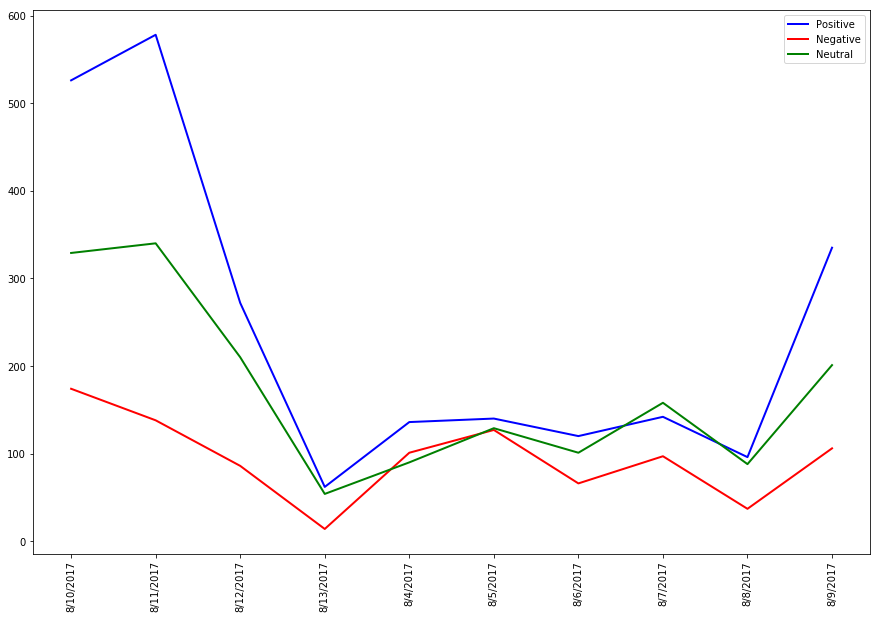

In [39]:
plt.figure(figsize=(15,10))
plt.plot('Created_Date', 'sentiment_vader', data=df_ht_positive, color='blue', linewidth=2, label='Positive')
plt.plot('Created_Date', 'sentiment_vader', data=df_ht_negative, color='red', linewidth=2, label='Negative')
plt.plot('Created_Date', 'sentiment_vader', data=df_ht_neutral, color='green', linewidth=2, label='Neutral')
plt.xticks(rotation=90)
plt.legend()
plt.show()